In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df = df.drop(['PassengerId','Name','SibSp','Parch', 'Ticket','Cabin', 'Embarked'],axis='columns')

In [6]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [7]:
# use one hot encoding on Sex columns
dummies = pd.get_dummies(df.Sex)

In [8]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [9]:
df = pd.concat([df,dummies],axis='columns')

In [10]:
df

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,1
887,1,1,female,19.0,30.0000,1,0
888,0,3,female,NaN,23.4500,1,0
889,1,1,male,26.0,30.0000,0,1


In [11]:
# OR we can use label encoder to covert sex columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.head()

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,1,22.0,7.2500,0,1
1,1,1,0,38.0,71.2833,1,0
2,1,3,0,26.0,7.9250,1,0
3,1,1,0,35.0,53.1000,1,0
4,0,3,1,35.0,8.0500,0,1


In [12]:
df = df.drop(['female', 'male'],axis='columns')

In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [14]:
df = df.fillna(df.Age.median())

In [15]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [18]:
X = df.drop(['Survived'], axis='columns')
y = df.Survived

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [20]:
y_test.shape

(268,)

In [21]:
# Now implement Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")


model.fit(X_train, y_train)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [22]:
model.score(X_test,y_test)

0.8171641791044776

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.8171641791044776


In [24]:
model.predict([[3,1,30,7777.2500]])

/home/snaek/playground/mla/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [25]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[154,  20],
       [ 29,  65]])

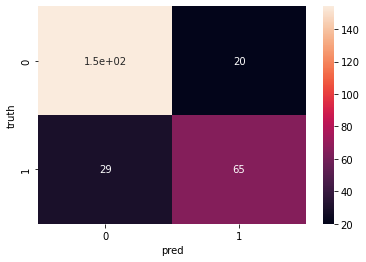

In [26]:
sns.heatmap(cm,annot=True)
plt.xlabel('pred')
plt.ylabel('truth')
plt.show()


In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       174
           1       0.76      0.69      0.73        94

    accuracy                           0.82       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.82      0.81       268

